### Assess your predicted strain designs using simulations and pathway visualizations

#### Pathway simulations with cameo - high level API

In [1]:

import code.io as io
model = io.read_yeast_model() # loading
from cobra import Reaction, Metabolite, Gene



In [2]:
model

Name,yeastGEM_v8__46__7__46__0
Memory address,1b451803cd0
Number of metabolites,2807
Number of reactions,4133
Number of genes,1163
Number of groups,106
Objective expression,1.0*r_2111 - 1.0*r_2111_reverse_58b69
Compartments,"cell envelope, cytoplasm, extracellular, mitochondrion, nucleus, peroxisome, endoplasmic reticulum, Golgi, lipid particle, vacuole, endoplasmic reticulum membrane, vacuolar membrane, Golgi membrane, mitochondrial membrane"


In [3]:
import cameo

In [4]:
from cameo import models
from collections.abc import Mapping

In [7]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [8]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [9]:
from collections.abc import Mapping
from collections.abc import MutableMapping
from collections.abc import Sequence

In [10]:
fseof = FSEOF(model)

In [16]:

fseof.run(target=model.reactions.R08695)

,1,2,3,4,5,6,7,8,9,10
r_0024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003360
r_0081,0.000001,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
r_0091,0.118262,0.203714,0.289166,0.374618,0.460070,0.545522,0.452487,0.272398,0.092309,0.000000
r_0103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010063
r_0104,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.614068
...,...,...,...,...,...,...,...,...,...,...
r_4018,0.000065,0.000060,0.000054,0.000048,0.000042,0.000036,0.000000,0.000000,0.000000,0.000000
r_4216,-0.000001,-0.000001,-0.000001,-0.000001,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
r_4226,-0.039670,-0.036125,-0.032580,-0.029035,-0.025490,-0.021944,-0.017939,-0.013759,-0.009578,-0.005205
r_4264,2.289830,2.118852,1.947874,1.776895,1.605917,1.434939,1.500182,1.641537,1.782892,1.958882


In [35]:
from cameo.flux_analysis.analysis import phenotypic_phase_plane
from cameo.strain_design.deterministic import DifferentialFVA
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
plotter = PlotlyPlotter()

In [38]:
production_envelope = phenotypic_phase_plane(model, 
                                             variables=[model.reactions.r_2111],
                                             objective=model.metabolites.beta_farnesene_c)
production_envelope.plot(height=400)

TypeError: PhenotypicPhasePlaneResult.plot() missing 1 required positional argument: 'plotter'

In [40]:
result = fseof.run(target=model.reactions.R08695)
df = result.data_frame

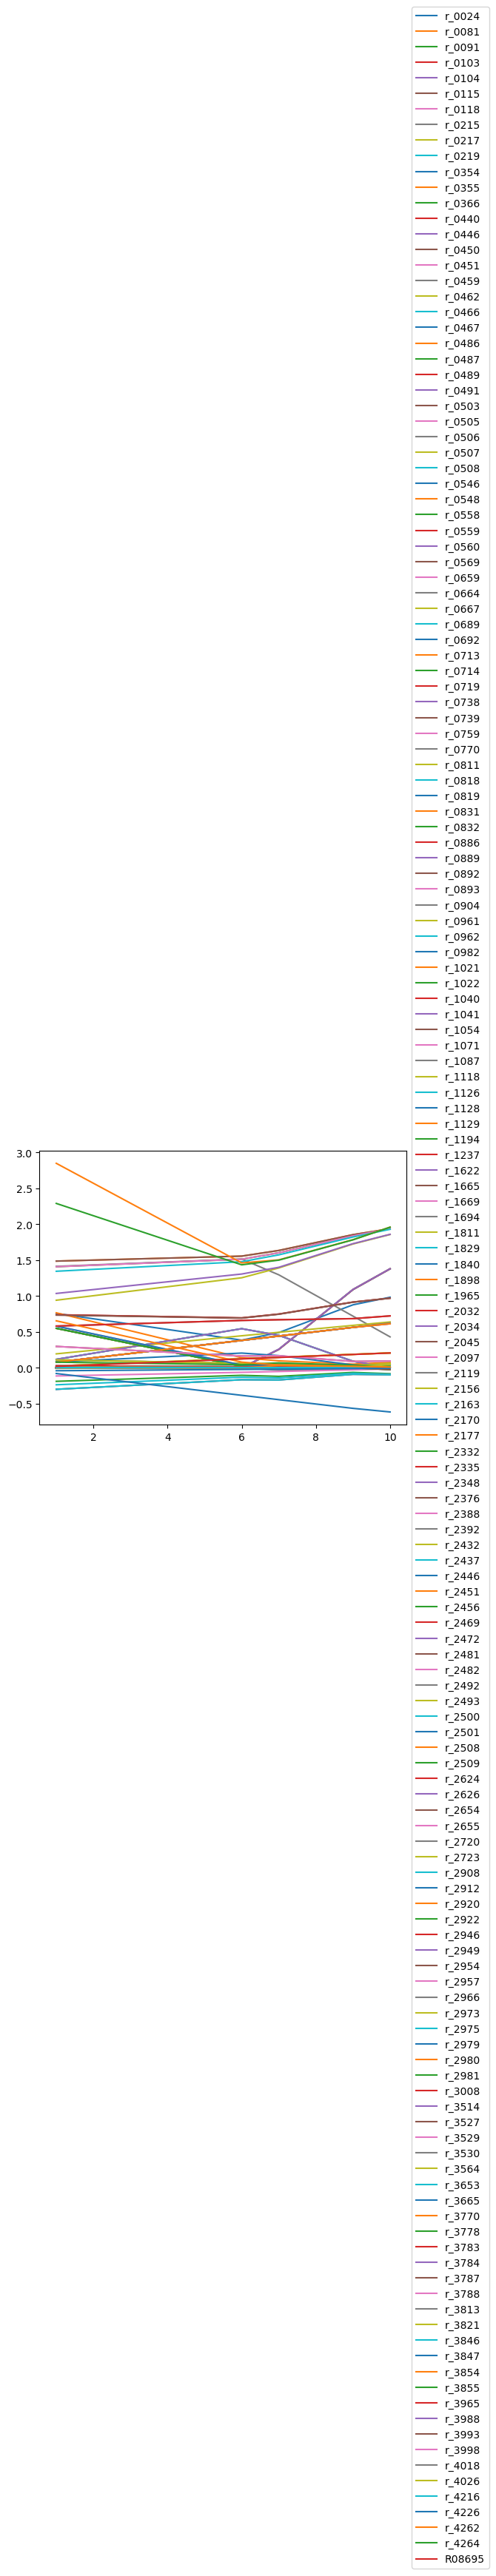

In [41]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [42]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)
 
from pytest import approx
# removing genes from dataframe 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df.head()

,1,2,3,4,5,6,7,8,9,10
r_1021,2.848394,2.570965,2.293535,2.016105,1.738675,1.461246,1.503830,1.644335,1.784840,1.959941
r_4264,2.289830,2.118852,1.947874,1.776895,1.605917,1.434939,1.500182,1.641537,1.782892,1.958882
r_0892,1.486771,1.500628,1.514486,1.528344,1.542202,1.556060,1.634907,1.744867,1.854827,1.937830
r_0486,1.486771,1.500628,1.514486,1.528344,1.542202,1.556060,1.634907,1.744867,1.854827,1.937830
r_0770,1.413461,1.433870,1.454280,1.474689,1.495098,1.515507,1.295578,1.008024,0.720471,0.431700


In [45]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1


In [46]:
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r_0451,0.550497,0.444766,0.339036,0.233305,0.127575,0.021844,-0.000000,-0.000000,-0.000000,-0.000000,inf
r_0904,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.624131,1.873687
r_0104,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.614068,1.871617
r_0739,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.624131,1.873687
r_0738,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.624131,1.873687
r_0560,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.614068,1.871617
r_0558,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.624131,1.873687
r_1129,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.614068,1.871617
r_0667,0.026279,0.046514,0.066750,0.086986,0.107222,0.127458,0.147630,0.167777,0.187924,0.208044,1.873685
r_0355,0.026279,0.046514,0.066750,0.086986,0.107222,0.127458,0.147630,0.167777,0.187924,0.208044,1.873685


Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

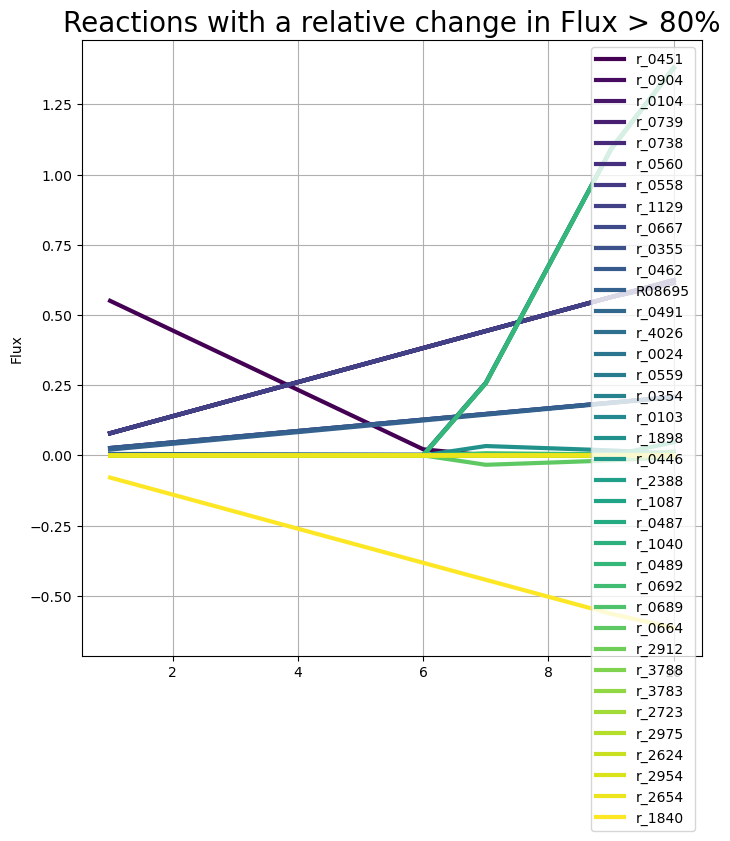

In [47]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

In [49]:
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r_2975,-0.000065,-0.000060,-0.000054,-0.000048,-0.000042,-0.000036,-0.000000,0.00000,0.000000,0.000000,inf
r_2624,-0.000065,-0.000060,-0.000054,-0.000048,-0.000042,-0.000036,-0.000000,0.00000,0.000000,0.000000,inf
r_2954,-0.000065,-0.000060,-0.000054,-0.000048,-0.000042,-0.000036,-0.000000,0.00000,0.000000,0.000000,inf
r_2654,-0.000065,-0.000060,-0.000054,-0.000048,-0.000042,-0.000036,-0.000000,0.00000,0.000000,0.000000,inf
r_1840,-0.078836,-0.139543,-0.200251,-0.260959,-0.321666,-0.382374,-0.442889,-0.50333,-0.563771,-0.614068,1.871617


In [50]:
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r_0451,0.550497,0.444766,0.339036,0.233305,0.127575,0.021844,-0.000000,-0.00000,-0.000000,-0.000000,inf
r_0904,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.50333,0.563771,0.624131,1.873687
r_0104,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.50333,0.563771,0.614068,1.871617
r_0739,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.50333,0.563771,0.624131,1.873687
r_0738,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.50333,0.563771,0.624131,1.873687


In [52]:
model.reactions.r_0451
model.reactions.r_0904
model.reactions.r_0104
model.reactions.r_0739
model.reactions.r_0738

Reaction identifier,r_0738
Name,mevalonate kinase (UTP)
Memory address,0x1b40120a990
Stoichiometry,s_0028 + s_1559 --> s_0019 + s_0794 + s_1538 (R)-mevalonate + UTP --> (R)-5-phosphomevalonic acid + H+ + UDP
GPR,YMR208W
Lower bound,0.0
Upper bound,1000.0
